<a href="https://colab.research.google.com/github/deegrayce/Boston_houseprices_analysis/blob/main/Boston_House_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**Exploratory Data Analysis**

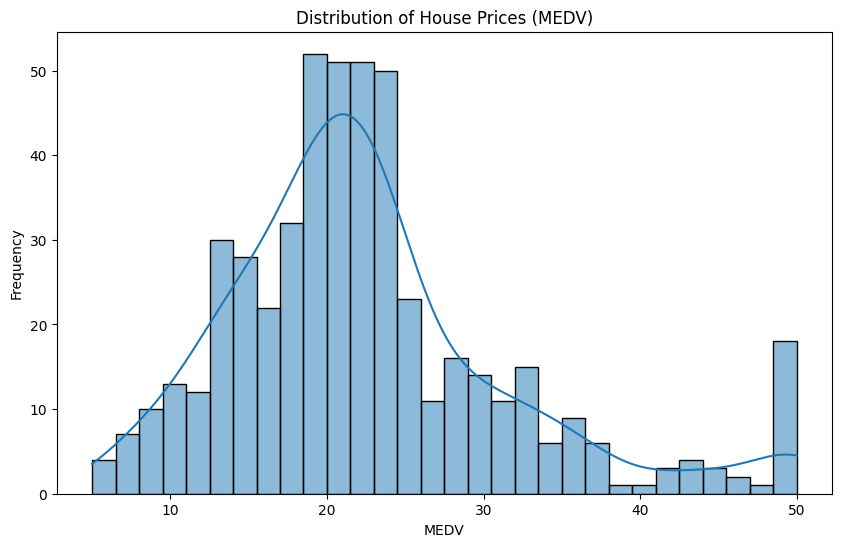

In [6]:
# Visualizing the distribution of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, bins=30)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

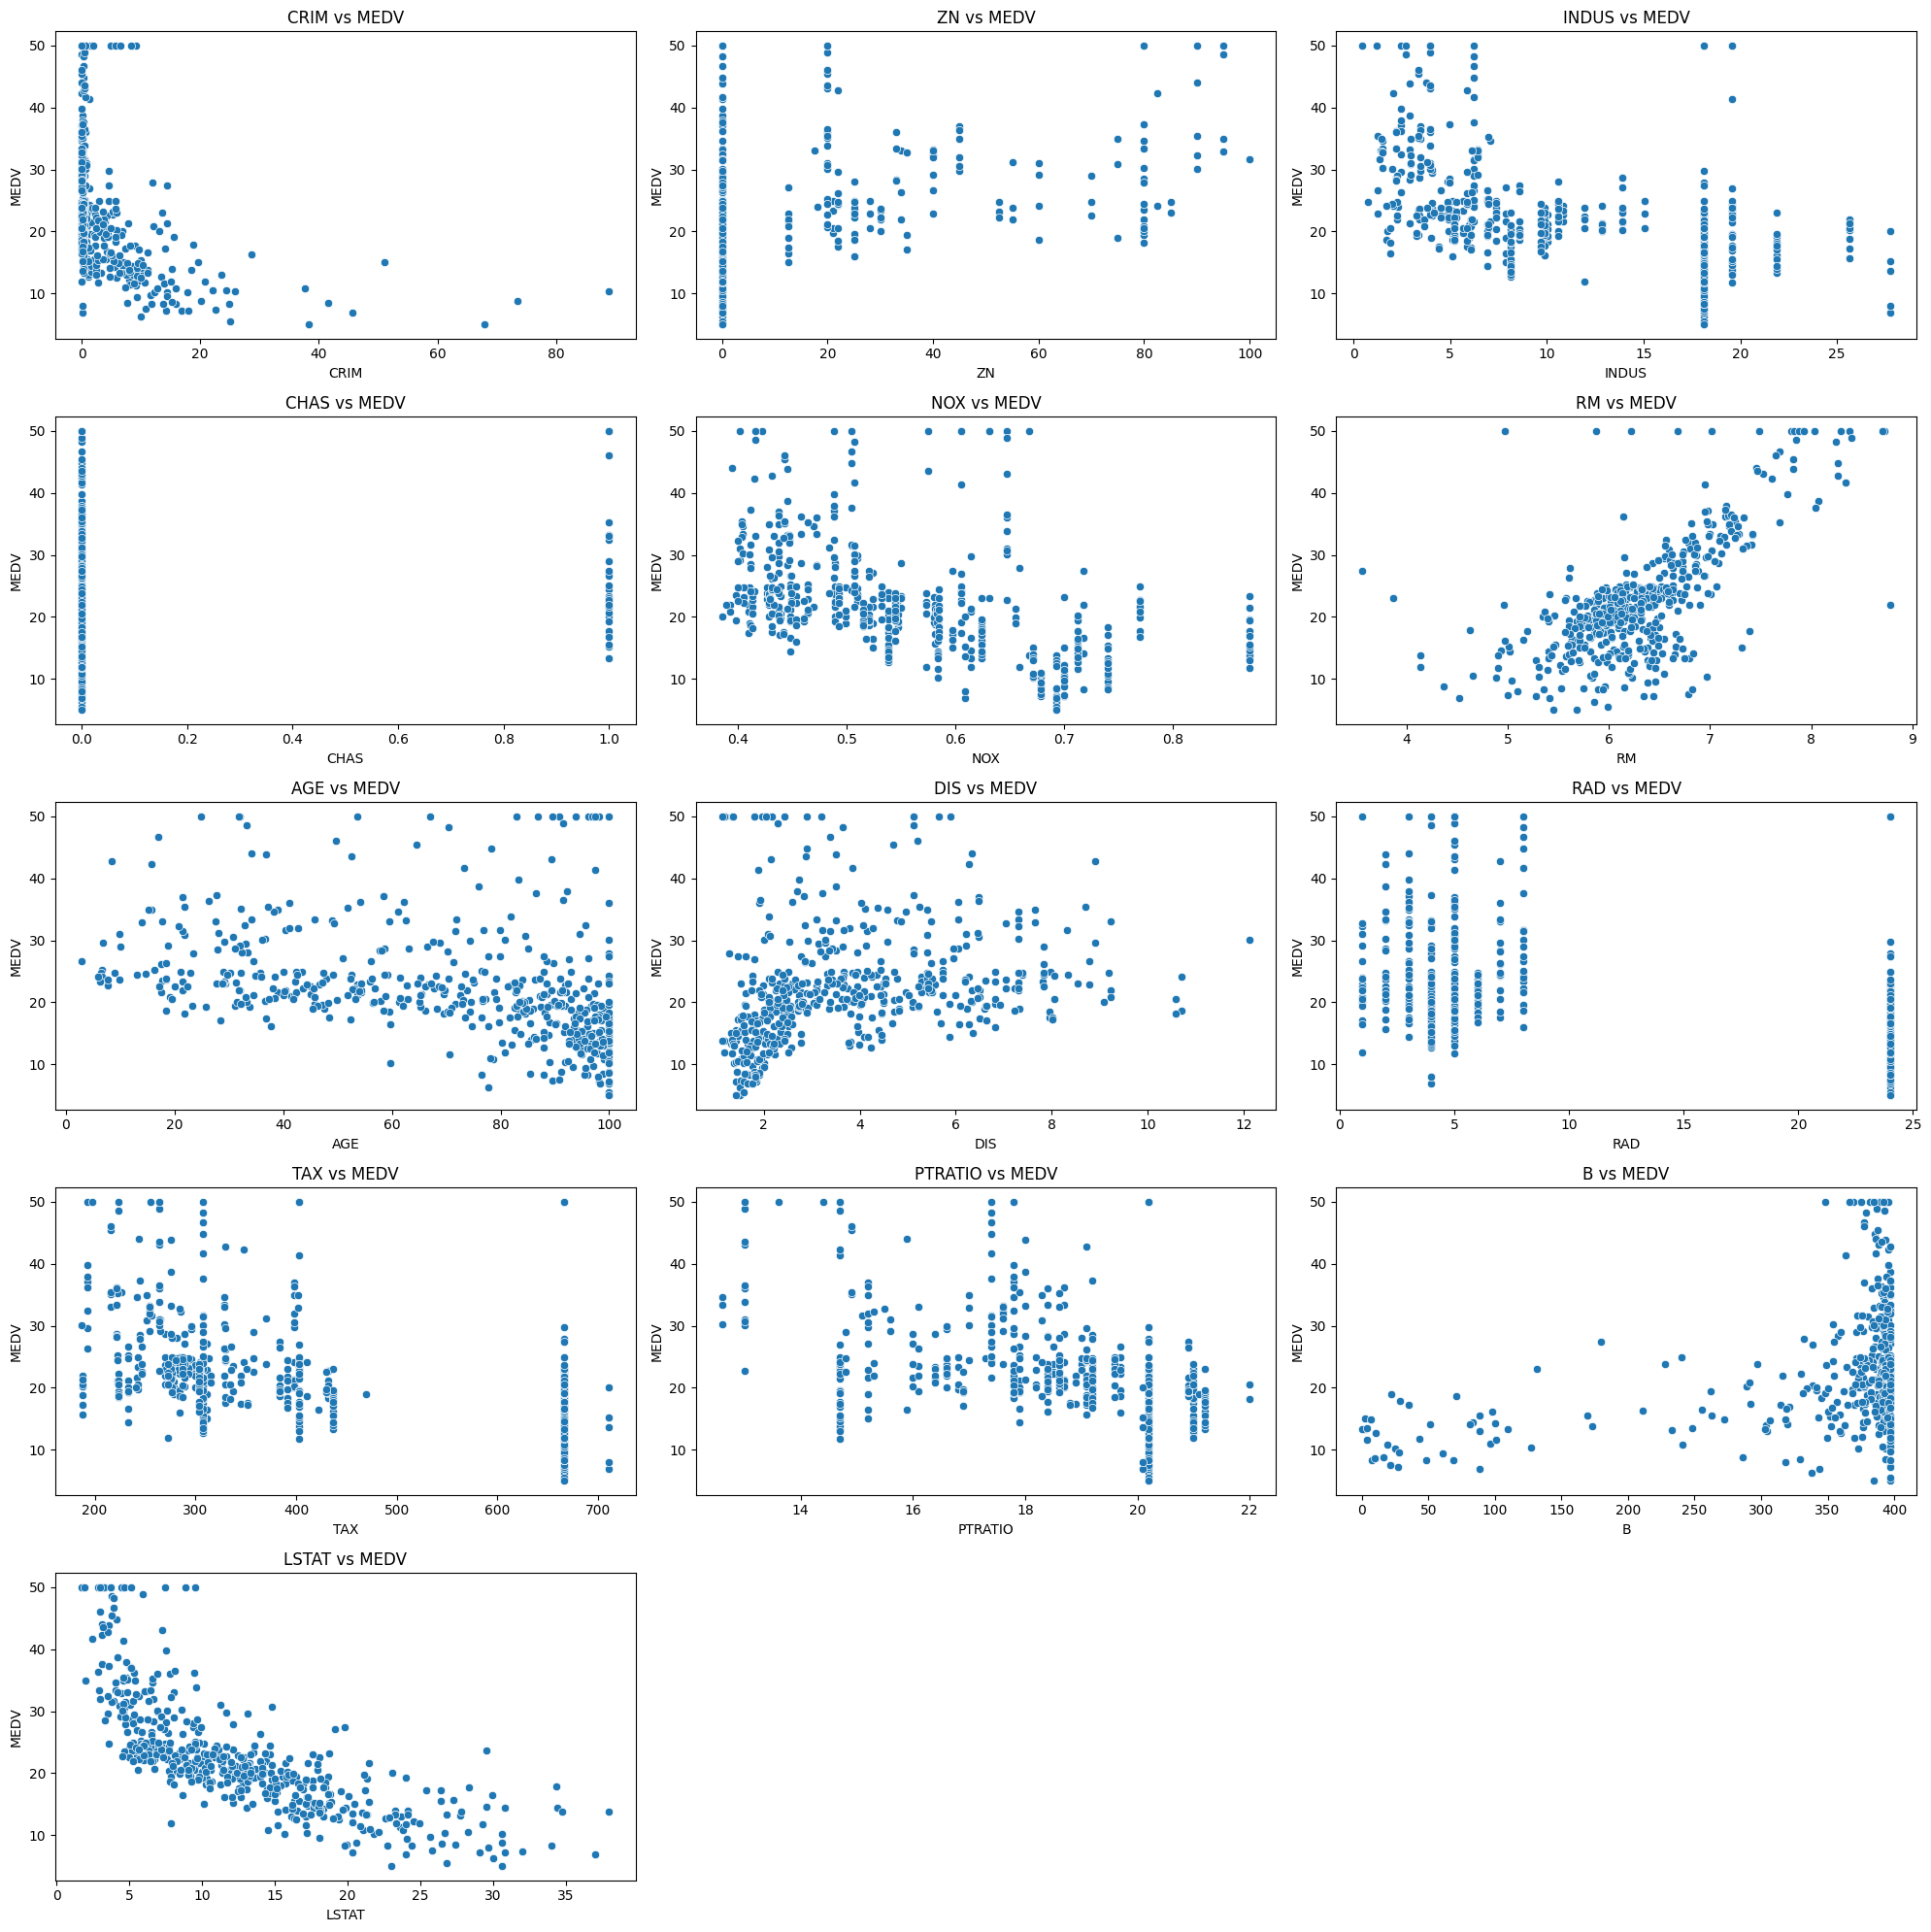

In [7]:
# Visualizing the relationships between features and the target variable using scatter plots
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

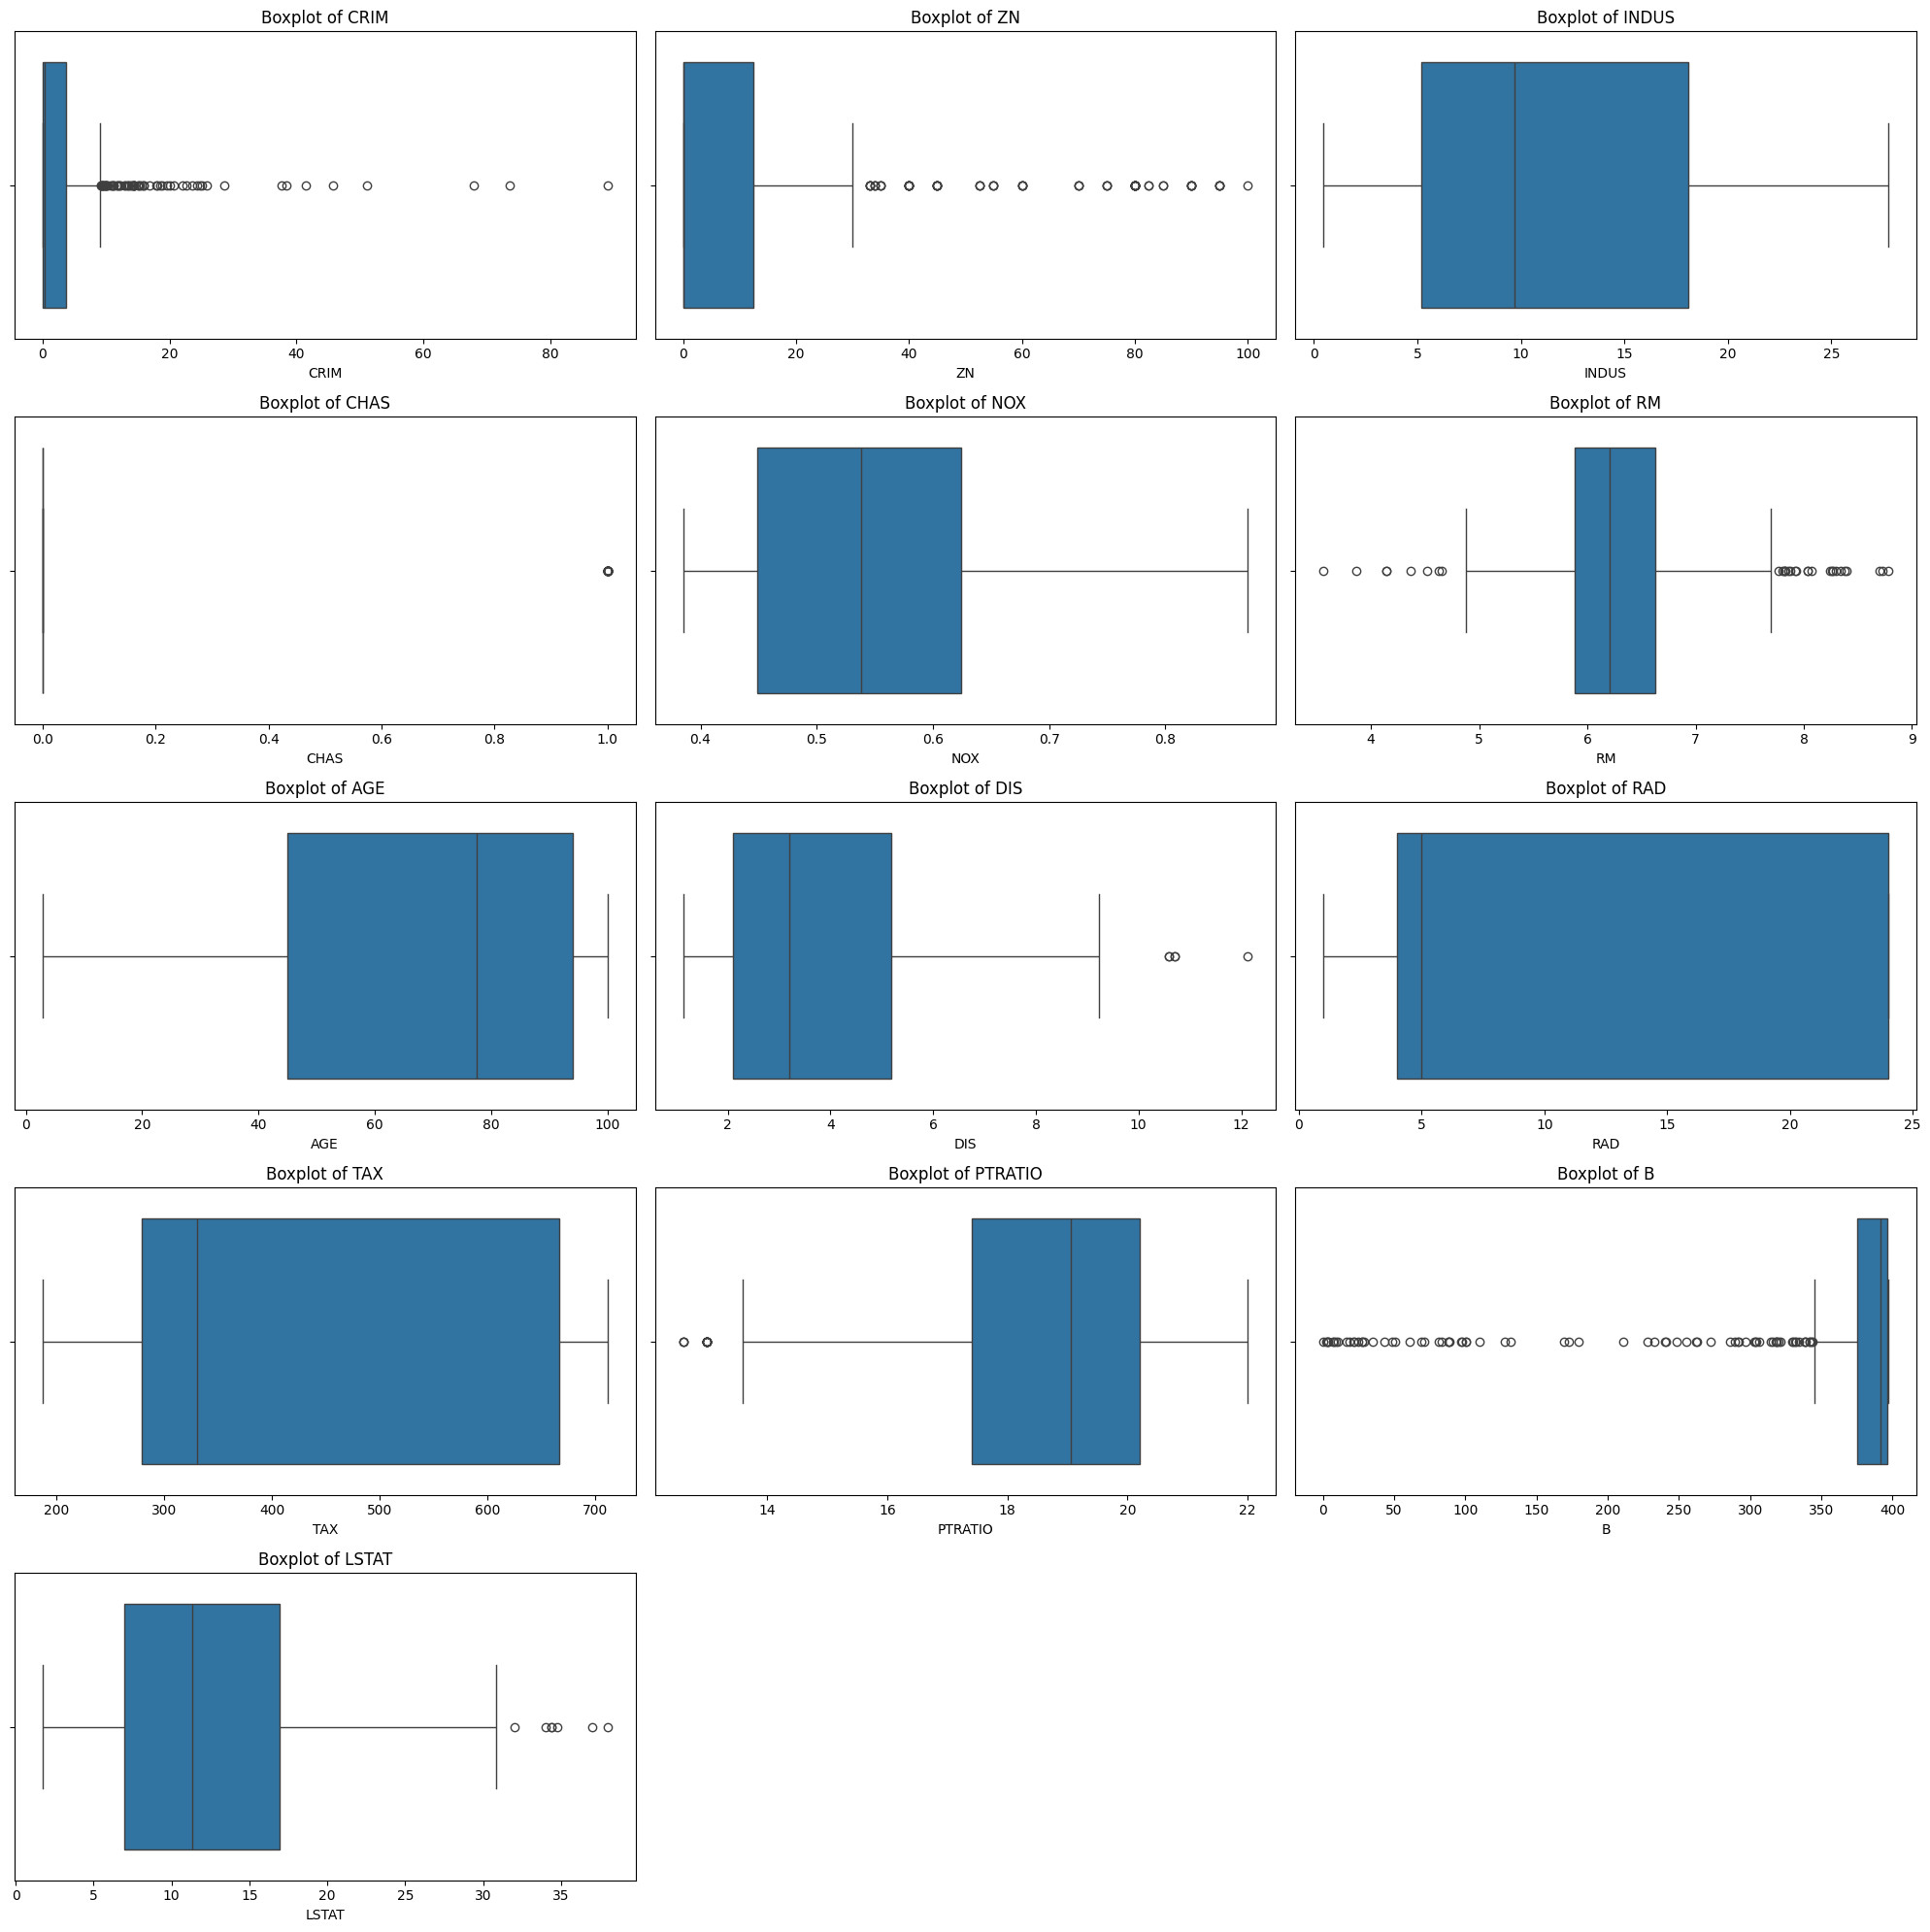

In [8]:
# Visualizing the relationships using box plots
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

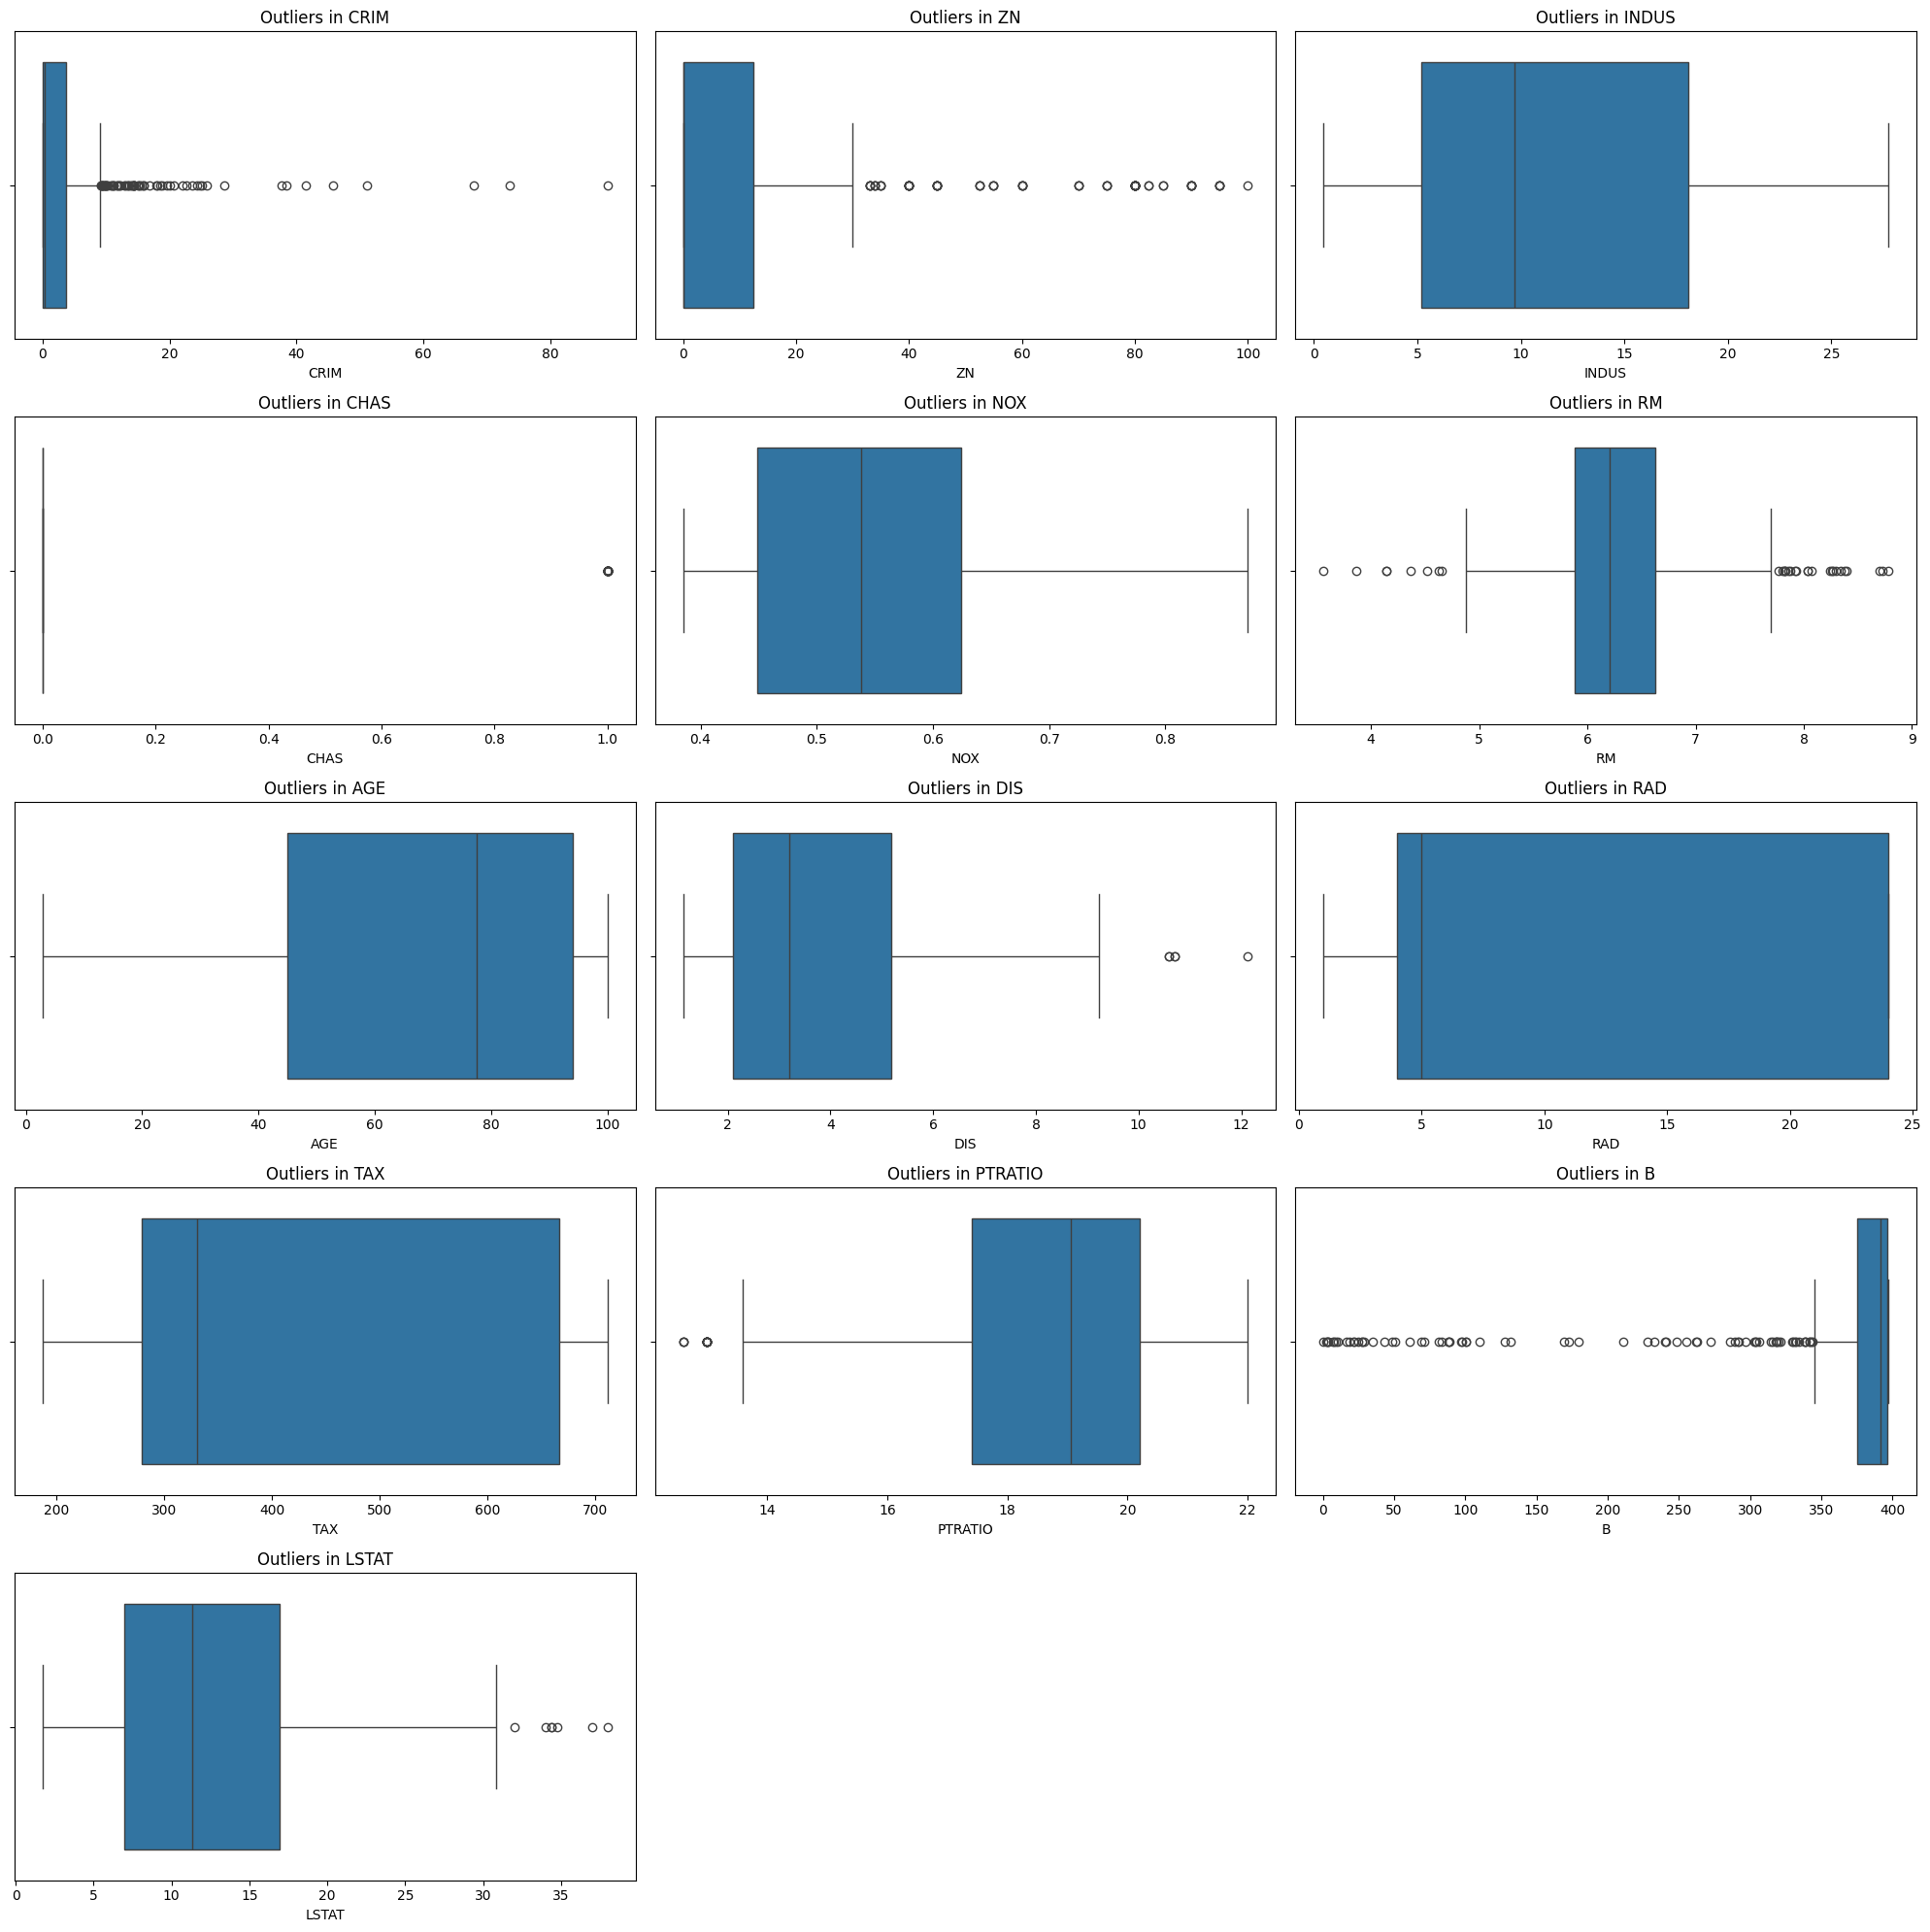

In [9]:
# Identifying and handling outliers
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()


In [10]:
# Handling outliers using IQR
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]

print("Data after removing outliers:")
print(df.describe())

Data after removing outliers:
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  230.000000  230.000000  230.000000  230.0  230.000000  230.000000   
mean     0.223966    7.730435    8.326130    0.0    0.496777    6.274526   
std      0.288225   13.089845    5.287106    0.0    0.057455    0.433845   
min      0.006320    0.000000    1.250000    0.0    0.409000    5.390000   
25%      0.068670    0.000000    5.130000    0.0    0.443425    5.961500   
50%      0.126970    0.000000    7.015000    0.0    0.493000    6.179000   
75%      0.244172   16.250000    9.900000    0.0    0.538000    6.539500   
max      2.242360   45.000000   25.650000    0.0    0.624000    7.489000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean    59.411739    4.441011    4.508696  307.756522   18.551739  391.571652   
std     26.223390    1.740979    1.636754 

## **Feature Engineering**

In [11]:
# Feature engineering
from sklearn.preprocessing import StandardScaler

# Encode categorical variables (in this case 'CHAS' is a binary categorical variable)
df['CHAS'] = df['CHAS'].astype('category')

# Normalize or standardize numerical features
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Data after feature engineering:")
print(df.head())


Data after feature engineering:
       CRIM        ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.756771  0.786256 -1.140369    0  0.719046  0.694094  0.221210 -0.202057   
1 -0.683787 -0.591855 -0.238102    0 -0.484521  0.338354  0.744784  0.302839   
2 -0.683856 -0.591855 -0.238102    0 -0.484521  2.103192  0.064520  0.302839   
3 -0.666193 -0.591855 -1.165011    0 -0.676394  1.671223 -0.520201  0.933225   
4 -0.538654 -0.591855 -1.165011    0 -0.676394  2.015412 -0.199177  0.933225   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -2.148367 -0.175601 -1.887715  0.799823 -1.230528  24.0  
1 -1.536069 -0.982170 -0.436403  0.799823 -0.246681  21.6  
2 -1.536069 -0.982170 -0.436403  0.188887 -1.455204  34.7  
3 -0.923771 -1.280900  0.086069  0.459080 -1.712991  33.4  
4 -0.923771 -1.280900  0.086069  0.799823 -1.147752  36.2  


In [12]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset into training and testing sets
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Train and evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    model_performance[model_name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

print("Model Performance:")
print(pd.DataFrame(model_performance).T)

# Perform hyperparameter tuning for the best model (e.g., Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Evaluate the best model on the testing set
best_rmse, best_mae, best_r2 = evaluate_model(best_rf, X_test, y_test)
print(f'Best Random Forest Performance: RMSE={best_rmse}, MAE={best_mae}, R²={best_r2}')


Model Performance:
                       RMSE       MAE        R²
Linear Regression  2.881577  2.073454  0.746000
Decision Tree      3.850042  2.736957  0.546575
Random Forest      2.753626  2.050652  0.768056
Gradient Boosting  2.422450  1.845806  0.820492
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest Performance: RMSE=2.5930139233506364, MAE=1.969613386402246, R²=0.7943239481804296
